### Import Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from __future__ import division

In [2]:
df = pd.read_csv('./data/loans.csv')

### Explore Data

In [3]:
df.head()

,credit_policy,purpose,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0.0,0.0,0.0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0.0,0.0,0.0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1.0,0.0,0.0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1.0,0.0,0.0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0.0,1.0,0.0,0


In [4]:
df.shape

(9578, 14)

<span style="color:green">There are **9578** instanes, each has **13 features** plus **1 target**</span>

### Feature description
<br>
credit_policy: 1 if borrower matched lender's conditions, 0 otherwise <br>
purpose : the purpose of the loan (debt_consolidation, credit_card, home_improvement, small_business, major_purchase, educational, all_others) <br>
int_rate : interest rate of the loan <br>
installment : money that borrowers has to pay monthly <br>
log_annual_inc : log of annual income <br>
dti : debt-to-income ratio <br>
fico : FICO credit score <br>
days_with_cr_line : The number of days the borrowers has credit line <br>
revol_bal : The borrower's revoling balance <br>
revol_util : The borrower's revoling utilization rate (balance / credit limit) <br>
inq_last_6mths : The borrower’s number of inquiries by creditors in the last 6 months. <br>
delinq_2yrs : The number of times borrowers has been 30+ exceed the due date in last 2 years <br>
pub_rec : The borrower's number of derogatory public records <br>
not_fully_paid : 1 if borrower is not paid fully, 0 otherwise

### Check for data types

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit_policy        9578 non-null int64
purpose              9578 non-null object
int_rate             9578 non-null float64
installment          9578 non-null float64
log_annual_inc       9574 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days_with_cr_line    9549 non-null float64
revol_bal            9578 non-null int64
revol_util           9516 non-null float64
inq_last_6mths       9549 non-null float64
delinq_2yrs          9549 non-null float64
pub_rec              9549 non-null float64
not_fully_paid       9578 non-null int64
dtypes: float64(9), int64(4), object(1)
memory usage: 1.0+ MB


In [6]:
df['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

<span style="color:red">**purpose is categorical, need one-hot encoding**</span>

### Check for missing values

In [7]:
df.isnull().sum()

credit_policy         0
purpose               0
int_rate              0
installment           0
log_annual_inc        4
dti                   0
fico                  0
days_with_cr_line    29
revol_bal             0
revol_util           62
inq_last_6mths       29
delinq_2yrs          29
pub_rec              29
not_fully_paid        0
dtype: int64

<span style="color:red">**There are missing values in following features**</span>
<br>
<span style="color:red">log_annual_inc | days_with_cr_line | revol_util | inq_last_6mths | delinq_2yrs | pub_rec</span>

### Check for overall infomations

In [8]:
df.describe()

,credit_policy,int_rate,installment,log_annual_inc,dti,fico,days_with_cr_line,revol_bal,revol_util,inq_last_6mths,delinq_2yrs,pub_rec,not_fully_paid
count,9578.000000,9578.000000,9578.000000,9574.000000,9578.000000,9578.000000,9549.000000,9.578000e+03,9516.000000,9549.000000,9549.000000,9549.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.931874,12.606679,710.846314,4562.026085,1.691396e+04,46.865677,1.571578,0.163787,0.062101,0.160054
std,0.396245,0.026847,207.071301,0.614736,6.883970,37.970537,2497.985733,3.375619e+04,29.018642,2.198095,0.546712,0.262152,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.700000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.927987,12.665000,707.000000,4139.958333,8.596000e+03,46.400000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.289832,17.950000,737.000000,5730.000000,1.824950e+04,71.000000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


<span style="color:green">**80% have credit_policy**</span>


### Check for the ratio of class in target variable

In [9]:
df['not_fully_paid'].unique()

array([0, 1])


<span style="color:green">**There are 2 classes in target variable (Binary Classification)**</span>


In [10]:
n_samples = df.shape[0]
n_pos = df[df['not_fully_paid'] == 1].shape[0]
n_neg = df[df['not_fully_paid'] == 0].shape[0]
n_pos_rate = n_pos / n_samples
n_neg_rate = n_neg / n_samples

print("Number of Positive: ", n_pos)
print("Number of Negative: ", n_neg)
print("Number of Positive rate: ", n_pos_rate)
print("Number of Negative rate: ", n_neg_rate)

Number of Positive:  1533
Number of Negative:  8045
Number of Positive rate:  0.16005429108373356
Number of Negative rate:  0.8399457089162664


In [11]:
neg_to_pos_rate = (n_neg / n_pos)
print("Negative-to-Positive ratio: ", neg_to_pos_rate)

Negative-to-Positive ratio:  5.247879973907371


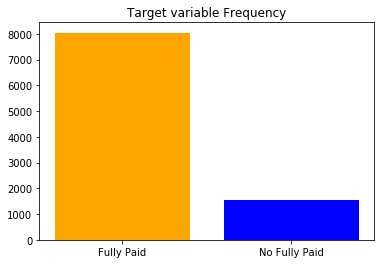

In [12]:
plt.bar(['Fully Paid', 'No Fully Paid'], [n_neg, n_pos], color=['orange', 'blue'])
plt.title("Target variable Frequency")
plt.show()

### Handle missing values
<span>**Evaluate the following strategies:**</span><br>
1. Delete instance containing missing values <br>
2. Impute with Mean <br>
3. Impute with Median <br>
4. Impute with MICE algorithm

we'll train servaral RandomForest models with predefined parameters on different strategies and compare their AUC score

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import (LabelBinarizer, RobustScaler, FunctionTransformer)
from sklearn.pipeline import (make_pipeline, make_union)
from sklearn.model_selection import cross_val_score

rf_clf = RandomForestClassifier(n_estimators=500, max_features=0.25, criterion='entropy', class_weight='balanced', random_state=42)

class FeaturesSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attributes):
        self.attributes = attributes
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        return X[self.attributes]
    
class LabelBinarizerPipelineFriendly(LabelBinarizer):
    def fit(self, X, y=None):
        """this would allow us to fit the model based on the X input."""
        super(LabelBinarizerPipelineFriendly, self).fit(X)
    def transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).transform(X)
    def fit_transform(self, X, y=None):
        return super(LabelBinarizerPipelineFriendly, self).fit(X).transform(X)

class DropFirst(BaseEstimator, TransformerMixin):  
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        pass
    
    def transform(self, X, y=None):
        return X[:, 1:]
            
#original data
X = df.drop(columns=['not_fully_paid'], axis=1)
Y = df['not_fully_paid']

num_cols = X.drop(['purpose'], axis=1).columns
cate_cols = ['purpose']

#build pipelinne
num_pipeline = make_pipeline(
    FeaturesSelector(num_cols), 
    RobustScaler(),
)
cate_pipeline = make_pipeline(
    FeaturesSelector(cate_cols),
    LabelBinarizerPipelineFriendly(),
    FunctionTransformer(lambda x: x[:, 1:])
)
full_pipeline = make_union(num_pipeline, cate_pipeline)

#tranforms data
X_prepared = full_pipeline.fit_transform(X)

#train test split
X_train, X_test, Y_train, Y_test = train_test_split(X_prepared, Y, test_size=0.2, shuffle=True, random_state=123, stratify=Y)

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)
/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/_function_transformer.py:98: FutureWarning: The default validate=True will be replaced by validate=False in 0.22.
  "validate=False in 0.22.", FutureWarning)


In [14]:
#Base model -- drops NA
train_indices_na = np.max(np.isnan(X_train), axis=1)
test_indices_na = np.max(np.isnan(X_train), axis=1)

X_train_drop_na = X_train[~train_indices_na]
Y_train_drop_na = Y_train[~train_indices_na]

base_scores = cross_val_score(rf_clf, X_train_drop_na, Y_train_drop_na, cv=5, scoring='roc_auc')
print("original data shape:", X_prepared.shape)
print("After dropping NAs:", X_train_drop_na.shape)
print("Baseline model's score ", base_scores.mean())

original data shape: (9578, 18)
After dropping NAs: (7611, 18)
Baseline model's score  0.6528580921371218


In [15]:
#Median imputation model
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy='median')
X_train_impute_median = imputer.fit_transform(X_train)
Y_train_impute_median = Y_train

impute_median_scores = cross_val_score(rf_clf, X_train_impute_median, Y_train_impute_median, cv=5, scoring='roc_auc')
print("Median Imputation scores: ", impute_median_scores.mean())

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Median Imputation scores:  0.6491289746796488


In [16]:
#Mean imputation model
imputer = Imputer(strategy='mean')
X_train_impute_mean = imputer.fit_transform(X_train)
Y_train_impute_mean = Y_train

impute_mean_scores = cross_val_score(rf_clf, X_train_impute_mean, Y_train_impute_mean, cv=5, scoring='roc_auc')
print("Mean Imputation scores:", impute_mean_scores.mean())

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Mean Imputation scores: 0.6516588672945665


<span style='color:red'>It seems like any imputation strategy yied quite the same results</span> <br>
<span style='color:red'>So we'll **choose Median imputation**</span> 

### Select the most important features 

In [36]:
#add columns to indicate missing values
X = df.drop(columns=['not_fully_paid'])
Y = df['not_fully_paid']

cate_features = X.dtypes[X.dtypes == 'object'].keys()
num_features = X.dtypes[X.dtypes != 'object'].keys()

df_na_indicated = X.copy()
for feature in X.columns:
    if(np.any(pd.isnull(X[feature]))):
        df_na_indicated['is_' + feature + '_missing'] = pd.isnull(X[feature]) * 1

#missing dummies variables
df_na_indicated.drop(columns=X.columns, axis=1, inplace=True)

#categorical dummy variables
X_dummies = pd.get_dummies(X, columns=cate_features, drop_first=True)
X_dummies.drop(columns=list(num_features), axis=1, inplace=True)


#numerical prepared variables
num_pipeline = make_pipeline(
    Imputer(strategy='median'),
    RobustScaler()
)
X_num_prepared = num_pipeline.fit_transform(X[num_features])
X_num_prepared = pd.DataFrame(columns=num_features, data=X_num_prepared)

X_prepared = pd.concat([X_num_prepared, X_dummies, df_na_indicated], axis=1)

rf_clf.fit(X_prepared, Y)

/Users/80151/anaconda3/lib/python3.6/site-packages/sklearn/utils/deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='entropy', max_depth=None, max_features=0.25,
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=None, oob_score=False,
            random_state=42, verbose=0, warm_start=False)

<BarContainer object of 24 artists>

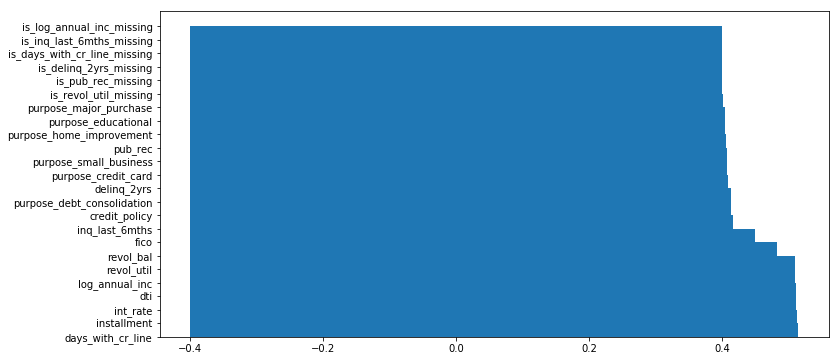

In [51]:
indices = np.argsort(rf_clf.feature_importances_)[::-1]
all_cols = X_prepared.columns

plt.figure(figsize=(12, 6))
plt.bar( rf_clf.feature_importances_[indices], all_cols[indices], align='center')